![banner](https://learn.responsibly.ai/assets/img/banner.jpg)

# Class 3 - Discrimination & Fairness: Analysis of Unfairness Metrics

## General Instructions

1. Start with running all cells in the notebook (Runtime > Run all)
2. Most of this Notebook would be familiar from the pre-class task.
3. Do not spend time understanding the details of the code. Focus on the text, comments, and outputs of cells.

## 1. Setup

In [1]:
!wget http://stash.responsibly.ai/3-fairness/activity/data-all.zip -O data-all.zip -q
!unzip -oq data-all.zip

In [2]:
%pip install pycm -q

     |████████████████████████████████| 66 kB 2.2 MB/s 
     |████████████████████████████████| 583 kB 9.5 MB/s 


In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display, Markdown

## 2. Dataset

In [4]:
train_df = pd.read_csv('./data-all/train.csv')
test_df = pd.read_csv('./data-all/test.csv')

The training dataset and the test dataset consists of multiple rows, one for each person, and three columns:

1. `bio` - The biographies as text (i.e., `string`). This is the input to the model.
1. `occupation` - The occupations of each person as text (i.e., `string`). This is the model's output.
1. `gender` - The gender of each person (`'M'` or `'F'`). **Note: This is a new column that you have not had in your pre-class task**.

In [5]:
train_df.head()

,bio,occupation,gender
0,His research and teaching focus on security s...,professor,M
1,He is currently associated with Shri Datta Ho...,dentist,M
2,Dr. Swarthout is an analytical environmental ...,professor,M
3,His work has appeared in major U.S. and Europ...,photographer,M
4,"He was born in the year 1977 in Rajshahi, hea...",photographer,M


In [6]:
test_df.head()

,bio,occupation,gender
0,"He has worked at the University of Valencia, ...",attorney,M
1,"Nick Romano is his client, a young man with a...",attorney,M
2,"In this position, he has written several best...",physician,M
3,His research focuses on using traditional and...,professor,M
4,His music to the period supernatural film The...,composer,M


We used 75%-25% split between the training and the test dataset:

In [7]:
print(f'# train: {len(train_df)}')
print(f'# test: {len(test_df)}')

# train: 280470
# test: 93492


There are 28 occupations:

In [8]:
sorted(train_df['occupation'].unique())

['accountant',
 'architect',
 'attorney',
 'chiropractor',
 'comedian',
 'composer',
 'dentist',
 'dietitian',
 'dj',
 'filmmaker',
 'interior_designer',
 'journalist',
 'model',
 'nurse',
 'painter',
 'paralegal',
 'pastor',
 'personal_trainer',
 'photographer',
 'physician',
 'poet',
 'professor',
 'psychologist',
 'rapper',
 'software_engineer',
 'surgeon',
 'teacher',
 'yoga_teacher']

Each running of the next cell will sample 10 random rows and show their occupations, gender and biographies:

In [9]:
for _, row in train_df.sample(10).iterrows():
    display(Markdown('### Ground-Truth Occupation: ' + row['occupation']))
    display(Markdown('#### Gender: ' + row['gender']))
    display(Markdown(row['bio']))

### Ground-Truth Occupation: comedian

#### Gender: F

 She has this bit in which she talks about trying to go home one night in Chicago while being followed by a really creepy dude. Like all good comedy, her bit is humorous, but her … Continue reading →

### Ground-Truth Occupation: professor

#### Gender: M

 Before joining the faculty at Minnesota, he earned his PhD in economic sociology at the University of Michigan, where he received fellowships from the National Science Foundation and the Rackham School of Graduate Studies. He earned his AB from the University of Chicago.

### Ground-Truth Occupation: photographer

#### Gender: M

 He named himself ›No.223‹ after the lovelorn cop character in Wong Kar-wai´s movie ›Chungking Express‹. Lin snaps his circle of friends and himself, portraying his view of youth culture and lifestyles in contemporary China. His photographs are marked by fashionable indolence, saturated colours, penetrating flash, and somewhat frontal shots that unveil his models’ empowering presence and vulnerability at the same time.

### Ground-Truth Occupation: surgeon

#### Gender: F

 Dr. Hein is a native of Michigan, where she attended college and medical school at the University of Michigan. She then trained at Harvard University in general surgery. After 2 years of scientific research studying the effects of Type II diabetes on the aorta, she returned to the Harvard University Plastic Surgery residency program for two years of plastic surgery residency. Finally, she completed another year of training focused on aesthetic (cosmetic) surgery, again at Harvard University.

### Ground-Truth Occupation: journalist

#### Gender: F

 Her work has appeared in Al Jazeera, BuzzFeed, The Caravan, the British Film Institute’s Sight and Sound, Roads & Kingdoms and the New York Times’ Women in the World. This is her first book.

### Ground-Truth Occupation: journalist

#### Gender: F

 She currently works as Managing News Editor of Raw Story, and contributes opinion and columns to blogs such as the Huffington Post, online publications such as Alternet, and has had her work referenced in Rolling Stone, Vanity Fair, and Newsweek among others.

### Ground-Truth Occupation: software_engineer

#### Gender: M

 He is an active technical Contributor of OpenStack since 2013. Swaminathan Vasudevan has been developing code for more than 18 years with expertise in linux, virtualization, networking, mobility, security and convergence.

### Ground-Truth Occupation: attorney

#### Gender: F

 Keith in the fall of 2013. She previously clerked for The Honorable Sterling Johnson, Jr, in the Eastern District of New York, and was most recently a visiting scholar at the West African Research Center in Dakar, Senegal. Marissa is the founder of the 4th World Initiative, an interdisciplinary think tank and grant-making organization dedicated to advancing human rights and development in the pan-African world. She currently lives in Harlem and blogs at www.marissaaljackson.com.

### Ground-Truth Occupation: comedian

#### Gender: M

 He has spent many years working for Walt Disney World. Will's style of comedy is fun & quirky. Will Hagaman is best known for his roles in the theater productions of Boome & Slade, The Bartender's Barber and Lester.

### Ground-Truth Occupation: accountant

#### Gender: F

 She is currently the Board Treasurer for Pet Partners, a nation-wide therapy animal nonprofit organization. She is also a Certified Field Traumatologist and Compassion Fatigue Educator with Green Cross Academy of Traumatology.

## 3. Model

We will use a Logistic Regression model with Bag of Words features.

### Training

In [10]:
# feature engineering: Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df['bio'])

In [11]:
# model: Logistic Regression
# might take a minute or two to run

from sklearn.linear_model import SGDClassifier

model = SGDClassifier().fit(X_train_counts, train_df['occupation'])

### Evaluation

In [12]:
print('Train Accuracy =',
      model.score(X_train_counts, train_df['occupation']))

X_test_counts = count_vect.transform(test_df['bio'])
print('Test Accuracy =',
      model.score(X_test_counts, test_df['occupation']))

Train Accuracy = 0.9092059756836738
Test Accuracy = 0.8553031275403243


### `predict` function

The function takes a list of bios (as text) and predicts their occupation.

In [13]:
def predict(bios):
    X_counts = count_vect.transform(bios)
    return model.predict(X_counts)

Let's predict the occupation of two famous people - Albert Einstein (professor) and Wisława Szymborska (poet):

In [14]:
einstein = """He is known for developing the theory of relativity,
but he also made important contributions to the development
of the theory of quantum mechanics.
Relativity and quantum mechanics are together
the two pillars of modern physics.
His mass–energy equivalence formula E = mc^2,
which arises from relativity theory,
has been dubbed \"the world's most famous equation\""""


szymborska = """She was a Polish poet, essayist, translator and recipient
of the 1996 Nobel Prize in Literature.
Born in Prowent, which has since become part of Kórnik,
she later resided in Kraków until the end of her life.
In Poland, her books have reached sales rivaling prominent prose authors',
though she wrote in a poem, "Some Like Poetry" ("Niektórzy lubią poezję"),
that "perhaps" two in a thousand people like poetry."""


print('Prediction:', predict([einstein, szymborska]))

Prediction: ['professor' 'poet']


Apply the model and generate predictions to the train and test dataset:

In [15]:
train_df['prediction'] = predict(train_df['bio'])
test_df['prediction'] = predict(test_df['bio'])

### Prediction demonstartion on train dataset

In [16]:
for _, row in train_df.sample(10).iterrows():
    display(Markdown('### Occupation: ' + row['occupation']))
    display(Markdown('#### Prediction: ' + row['prediction']))
    display(Markdown('#### Gender: ' + row['gender']))
    display(Markdown(row['bio']))

### Occupation: professor

#### Prediction: professor

#### Gender: M

 Previously, he was an Assistant Professor at Florida International University from 2012 to 2015. He received his B.E. from Tsinghua University in 2006, M.Phil. from Hong Kong University of Science and Technology in 2008, and Ph.D. from University of California, Los Angeles in 2012, all in electrical and computer engineering. His research interests include power-aware computing and systems, and smart grid, and network economics. He was a recipient of NSF Faculty Early Career Development (CAREER) Award in 2015.

### Occupation: nurse

#### Prediction: nurse

#### Gender: F

 Ms. Luann Sue Beacom's NPI Number is #1760578538 and has been listed in the NPI registry for 12 years. Ms. Luann Sue Beacom's practice location is listed as: 4060 4Th Ave Suite 420 San Diego, CA 92103 and can be reached via phone at (619) 299-3111.

### Occupation: journalist

#### Prediction: journalist

#### Gender: F

 Her other novels include "Bronoff's Rules" and "An Imperfect Candidate." She lives in Manhattan, where the devastation she witnessed on 9/11 inspired her to express in The Restaurant Reviewer her appreciation of the enduring beauty of New York City, its history, and its depth of humanity."

### Occupation: attorney

#### Prediction: attorney

#### Gender: M

 Chris has been licensed to practice law for the past 23 years. While Chris has served clients in California since 1993, he also recently obtained a license from the New Jersey state. He attended the University of Colorado, Boulder. Chris is now the corporate counsel at Tech Armor. Before his position at Tech Armor, Chris was a worldwide general counsel at Belkin International.

### Occupation: surgeon

#### Prediction: surgeon

#### Gender: M

 He is chief of surgery at Children's Hospital Los Angeles and Vice Dean for Medical Education at the Keck School of Medicine of the University of Southern California. Following the 2010 Haiti earthquake, Ford returned to Haiti to provide medical assistance to earthquake victims.

### Occupation: physician

#### Prediction: physician

#### Gender: F

 She is also an associate professor of medicine and quantitative health sciences at UMass Medical School. Her research focuses on electronic modes of health care communication and on medication safety. She is a practicing general internist.

### Occupation: surgeon

#### Prediction: surgeon

#### Gender: M

 He is Head of Spinal Services at the Royal Adelaide Hospital and Professor of Spinal Surgery at the University of Adelaide. In 2012, he was appointed Research Director at the Adelaide Centre for Spinal Research and co-director of the Centre for Orthopaedic and Trauma Research, the University of Adelaide. Professor Freeman is the senior clinician responsible for the management of traumatic spinal cord injured patients for central Australia (South Australia and Northern Territory).

### Occupation: psychologist

#### Prediction: journalist

#### Gender: F

 Her publications include a humorous middle-grade novel, a collection of romantic short stories written in Elizabethan-style prose, and a picture book about a young boy's first experience with death.

### Occupation: composer

#### Prediction: composer

#### Gender: M

 He composes everything from rhythm and blues parodies ("Go Cry on Somebody Else's Shoulder") to what he described (on the album) as "a curiously inconsistent piece which started out as a ballet but probably didn't make it" called Lumpy Gravy.

### Occupation: attorney

#### Prediction: attorney

#### Gender: M

 He is also the author of Mississippi River Country Tales, The Majesty of Eastern Mississippi and the Coast, and The Majesty of the Mississippi Delta, all published by Pelican.

## 4. Evaluation of a Single Occupation

Let's focus on a single occupation: **poet**. We could evaluate the classifier on the test dataset with respect to this label only.

Read this section carefully, it is extremely important.

### Metric I: Postivite Rate
> What it the proportion of bios that were predicted as `poet`?

In [17]:
print('Poet - Positive Rate', (test_df['prediction'] == 'poet').mean())

Poet - Positive Rate 0.03299747571984769


### Metric II: False Negative Rate
> What it the proportion of bios that were predicted incorrectly as NOT `poet` (i.e., something else) even though their true label is actually `poet`?

In [18]:
actual_poets_test_df = test_df[test_df['occupation'] == 'poet']
print('Poet - False Negative Rate', (actual_poets_test_df['prediction'] != 'poet').mean())

Poet - False Negative Rate 0.11754324038122133


### Metric III: False Positive Rate
> What it the proportion of bios that were predicted incorrectly as `poet` (i.e., something else) even though their true label is NOT `poet`?

In [19]:
actual_not_poets_test_df = test_df[test_df['occupation'] != 'poet']
print('Poet - False Positive Rate', (actual_not_poets_test_df['prediction'] == 'poet').mean())

Poet - False Positive Rate 0.006452751519429952


### Fancy Way to Summarize
You can skip this part if you understand the definition of the three metrics.

#### Confusion Matrix

Actual class/Predicted class | P | N
-----------------------------|---|--------------
P       | **TP** | FN
N     | FP | **TN** 


#### Metric Definitions


**Positive Rate** (acceptance rate)

${\displaystyle \mathrm {PR} 
= {\frac{\mathrm {TP + FP}}{\mathrm {TP+FN+FP+TN}}}}$


**False negative rate (FNR)**

${\displaystyle \mathrm {FNR} = {\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}}$

**False Positive Rate (FPR)**

${\displaystyle \mathrm {FPR} = {\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}}$

## 4. Unfairness Metric Results by Gender

Thanks to the additional column `gender`, we can compare the performance of the model separately on the female individuals and the male individuals in the test dataset.

In [20]:
# seperate the test dataset into two gendered datasets
male_test_df = test_df[test_df['gender'] == 'M']
female_test_df = test_df[test_df['gender'] == 'F']

# create the list of occupations
occupation = test_df['occupation'].unique().tolist()

We can compute the following evaluation metrics of each gender test dataset:

1.  `pr` - **Positive Rate** - used for Demographic Prity
2. `fnr` - **False Negative Rate** - used for Equalized Odds
3. `fpr` - **False Positive Rate** - used for Equalized Odds

In [21]:
from pycm import ConfusionMatrix

def classification_metrics(df, label_col, prediction_col):
    cm = ConfusionMatrix(df[label_col].values, df[prediction_col].values)
    positive_rate = df[prediction_col].value_counts(normalize=True)
    
    df = pd.DataFrame({"pr": positive_rate,
                       "fnr": cm.FNR,
                       "fpr": cm.FPR})
    df.index.name = "occupation"
    return df

# calculate the classification metrics per occuation
# on the female and male subset of the test dataset
male_metrics_df = classification_metrics(male_test_df, 'occupation', 'prediction')
female_metrics_df = classification_metrics(female_test_df, 'occupation', 'prediction')

# merge the metr
unfairness_metrics_df = pd.merge(male_metrics_df, female_metrics_df,
         left_index=True, right_index=True,
         suffixes=('_male', '_female'))

# sot columns
unfairness_metrics_df = unfairness_metrics_df[["pr_female", "pr_male",
                                               "fnr_female", "fnr_male",
                                               "fpr_female", "fpr_male"]]

We can have a quick look on the first few occupations with all metric:

In [22]:
unfairness_metrics_df.round(2).head(10)

,pr_female,pr_male,fnr_female,fnr_male,fpr_female,fpr_male
occupation,,,,,,
accountant,0.02,0.02,0.16,0.14,0.00,0.00
architect,0.02,0.05,0.23,0.26,0.00,0.01
attorney,0.11,0.14,0.08,0.05,0.01,0.01
chiropractor,0.00,0.01,0.26,0.20,0.00,0.00
comedian,0.00,0.01,0.15,0.13,0.00,0.00
composer,0.01,0.04,0.07,0.07,0.00,0.00
dentist,0.03,0.04,0.03,0.04,0.00,0.00
dietitian,0.03,0.00,0.08,0.26,0.00,0.00
dj,0.00,0.01,0.21,0.12,0.00,0.00


It is a bit difficult to analyze this table, so let's create a visualization. The following plot shows the value for female (blue) and male (orange) for each metric for across occupations. The occupations are ordered according to the Positive Rate.

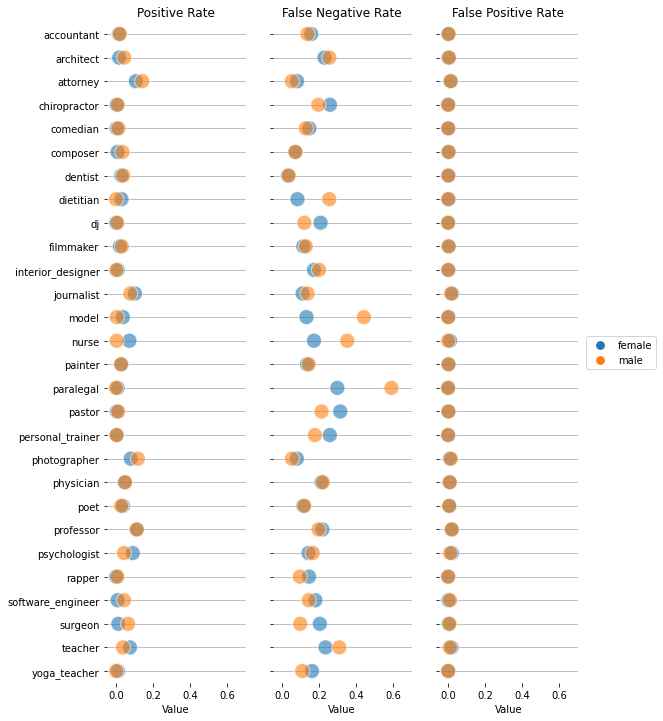

In [23]:
unfairness_metrics_wide_df = (pd.concat([female_metrics_df.assign(gender="female"),
                                         male_metrics_df.assign(gender="male")])
                              .reset_index())

# Make the PairGrid
g = sns.PairGrid(unfairness_metrics_wide_df,#.sort_values('pr', ascending=False),
                 x_vars=["pr", "fnr", "fpr"], y_vars=["occupation"],
                 hue="gender",
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      alpha=.6,
      linewidth=1, edgecolor="w")

# # Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.05, .7), xlabel="Value", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Positive Rate', 'False Negative Rate', 'False Positive Rate']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.legend(loc="center right", bbox_to_anchor=(1.6, 0.5));

**For reference only**, we also calculate the **gap** (**difference**) between the three metrics between females and males. A positive value means that this metric is larger for females, and a negative value means that the metric is larger for males.

The visualization above should be sufficient for your analysis, but we include this table just in case you would like to findout the exact difference of a specific occupation/metric.

In [24]:
# calculate the gap (difference) of the classification metrics
# between female indivdiuals and male individuals
# per occupation
for metric in ('pr', 'fnr', 'fpr'):
    unfairness_metrics_df[f'{metric}_gap'] = (unfairness_metrics_df[f'{metric}_female']
                                              - unfairness_metrics_df[f'{metric}_male'])

unfairness_metrics_df = unfairness_metrics_df.round(2)

# order columns
unfairness_metrics_df = unfairness_metrics_df[["pr_female", "pr_male", "pr_gap",
                                               "fnr_female", "fnr_male", "fnr_gap",
                                               "fpr_female", "fpr_male", "fpr_gap"]]


unfairness_metrics_df

,pr_female,pr_male,pr_gap,fnr_female,fnr_male,fnr_gap,fpr_female,fpr_male,fpr_gap
occupation,,,,,,,,,
accountant,0.02,0.02,-0.01,0.16,0.14,0.02,0.00,0.00,-0.00
architect,0.02,0.05,-0.03,0.23,0.26,-0.03,0.00,0.01,-0.00
attorney,0.11,0.14,-0.03,0.08,0.05,0.03,0.01,0.01,-0.00
chiropractor,0.00,0.01,-0.01,0.26,0.20,0.06,0.00,0.00,-0.00
comedian,0.00,0.01,-0.01,0.15,0.13,0.02,0.00,0.00,-0.00
composer,0.01,0.04,-0.03,0.07,0.07,-0.00,0.00,0.00,-0.00
dentist,0.03,0.04,-0.01,0.03,0.04,-0.00,0.00,0.00,-0.00
dietitian,0.03,0.00,0.03,0.08,0.26,-0.17,0.00,0.00,0.00
dj,0.00,0.01,-0.01,0.21,0.12,0.09,0.00,0.00,-0.00
